## Overview

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. 

## Tasks
### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.



In [85]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
login_df = pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [68]:
login_df.shape

(93142, 1)

In [30]:
login_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [69]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There are no null values. 

### Aggregate in 15 min intervals
Now, lets aggreagate these logins by 15 min interval and explore the patterns of usage.

In [70]:
login_df['no_logins'] = 1
login_df.set_index('login_time', inplace=True)

# aggregare in 15 min bins
agg_df = login_df.resample(rule='15T', label='right').sum()
agg_df

,no_logins
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


In [40]:
agg_df.shape

(9788, 1)

In [41]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   no_logins  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Now that we have grouped data into 15 mins bins, lets extract individual date time elements and create columns out of it.

In [71]:
agg_df['time_stamp'] = agg_df.index
agg_df['month'] = agg_df['time_stamp'].dt.month
agg_df['day'] = agg_df['time_stamp'].dt.day
agg_df['week'] = agg_df['time_stamp'].dt.isocalendar().week
agg_df['weekday'] = agg_df['time_stamp'].dt.weekday
agg_df['hour'] = agg_df['time_stamp'].dt.hour
agg_df

,no_logins,time_stamp,month,day,week,weekday,hour
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,1,3,20
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,1,3,20
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,1,3,20
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,1,3,21
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,1,3,21
...,...,...,...,...,...,...,...
1970-04-13 18:00:00,5,1970-04-13 18:00:00,4,13,16,0,18
1970-04-13 18:15:00,5,1970-04-13 18:15:00,4,13,16,0,18
1970-04-13 18:30:00,2,1970-04-13 18:30:00,4,13,16,0,18


Text(0, 0.5, 'Number of logins')

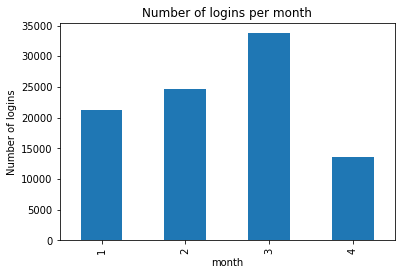

In [72]:
# Monthly usage

agg_df.groupby(by='month')['no_logins'].sum().plot(kind='bar')
plt.title("Number of logins per month")
plt.ylabel("Number of logins")

Text(0, 0.5, 'Number of logins')

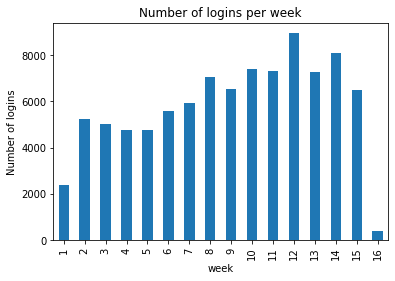

In [73]:
# Weekly usage

agg_df.groupby(by='week')['no_logins'].sum().plot(kind='bar')
plt.title("Number of logins per week")
plt.ylabel("Number of logins")

We have data only up April 13th. Hence it is not enough data to be included in comparisons.

We can see that usage was at peak in the month of March. Week 12 has a significant role in increasing the usage for March.

Text(0, 0.5, 'Number of logins')

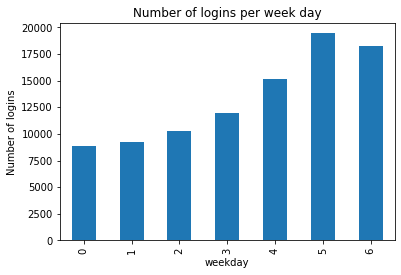

In [74]:
# Week day usage

agg_df.groupby(by='weekday')['no_logins'].sum().plot(kind='bar')
plt.title("Number of logins per week day")
plt.ylabel("Number of logins")

The usage is increasing gradually on weekdays from Monday to Friday and is at peak on weekends, particularly on Saturday.

### Daily cycles

Text(0, 0.5, 'Number of logins')

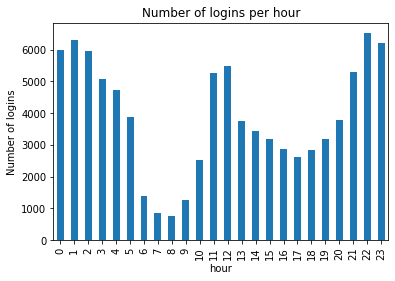

In [76]:
# hourly usage

agg_df.groupby(by='hour')['no_logins'].sum().plot(kind='bar')
plt.title("Number of logins per hour")
plt.ylabel("Number of logins")

Lets also calculate the average logins per hour as well.

Text(0, 0.5, 'Number of logins')

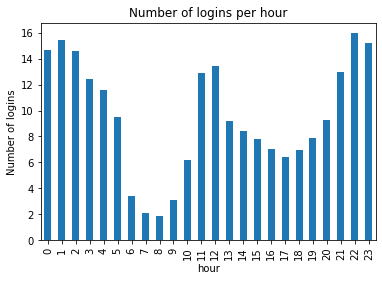

In [78]:
# hourly usage

agg_df.groupby(by='hour')['no_logins'].mean().plot(kind='bar')
plt.title("Number of logins per hour")
plt.ylabel("Number of logins")

In [80]:
#resample by hour

df_hourly = login_df.resample(rule='H').sum()
df_hourly.head()

,no_logins
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [83]:
df_hourly['time_stamp'] = df_hourly.index
df_hourly['hour'] = df_hourly['time_stamp'].dt.hour
df_hourly.drop(columns='time_stamp', inplace=True)
df_hourly

,no_logins,hour
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0
...,...,...
1970-04-13 14:00:00,32,14
1970-04-13 15:00:00,19,15
1970-04-13 16:00:00,22,16


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

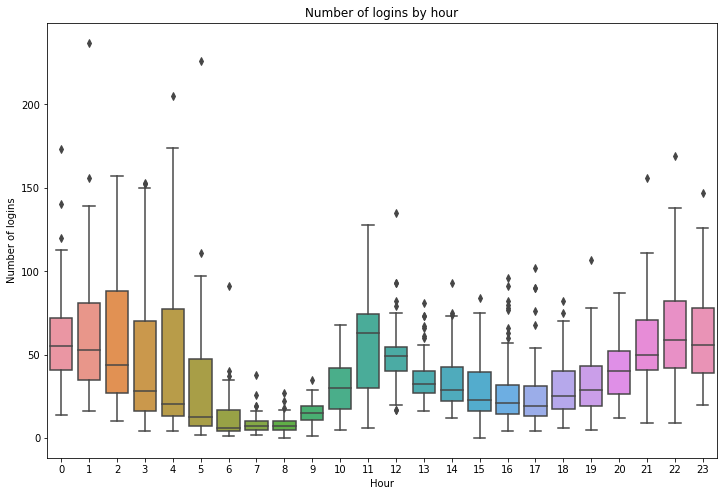

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x='hour', y='no_logins', data=df_hourly)
plt.title("Number of logins by hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

From this, it is clear that demand is at peak in the midnight, specifically from 10 pm to 2am and then gradually decreases. The demand is lowest in the morning between 6 am and 9 am. The demand again increases in the noon between 11 am and 12 pm.

Also, the range is huge at 2 am and 4 am.


### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the observation
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

In [ ]:
TBD

### Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
    2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
    3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
    
### Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [90]:
with open('ultimate_data_challenge.json') as data_file:
    ultimate_data = json.load(data_file)

In [99]:
df = pd.DataFrame(ultimate_data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [92]:
df.shape

(50000, 12)

In [93]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [100]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format="%Y-%m-%d")
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format="%Y-%m-%d")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [102]:
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,avg_rating_of_driver,8122
1,phone,396
2,avg_rating_by_driver,201


In [105]:
na_df=pd.DataFrame(df.isnull().mean()*100).reset_index()
na_df.columns = ['VarName', 'NullPercent']
na_df[(na_df['NullPercent']>0)]

,VarName,NullPercent
3,avg_rating_of_driver,16.244
6,phone,0.792
11,avg_rating_by_driver,0.402


There are missing values in `avg_rating_of_driver` and `avg_rating_by_driver` columns. As they are average values, we can fill those missing values with average values. For the `phone` column, only less than 1% values are missing and as we have a large sample size, we can safely delete those rows with missing values.

In [106]:
df['avg_rating_of_driver'].fillna(value=df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(value=df['avg_rating_by_driver'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [107]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### EDA

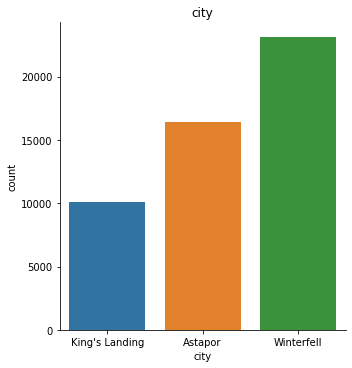

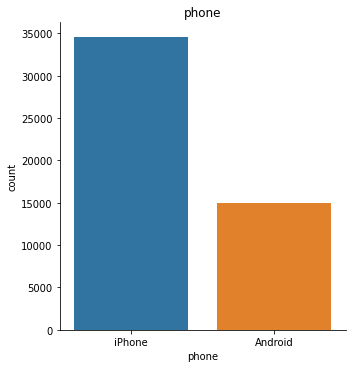

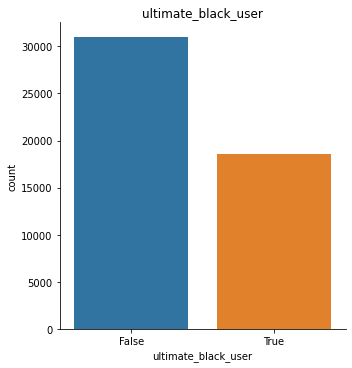

In [117]:
categorical_features = ['city', 'phone', 'ultimate_black_user']

for col in categorical_features:
    sns.catplot(x=col, data=df, kind='count')
    plt.title(col)

In [118]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

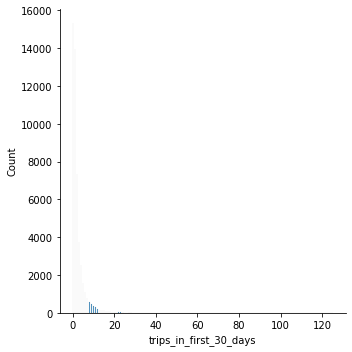

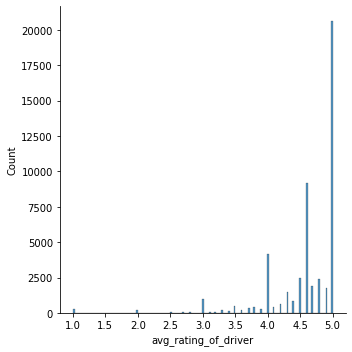

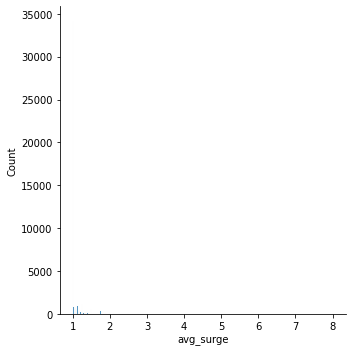

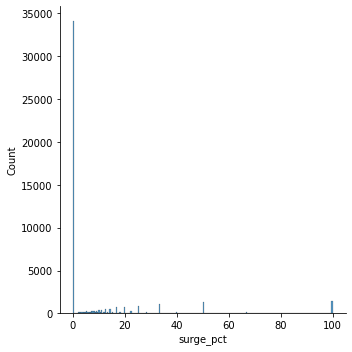

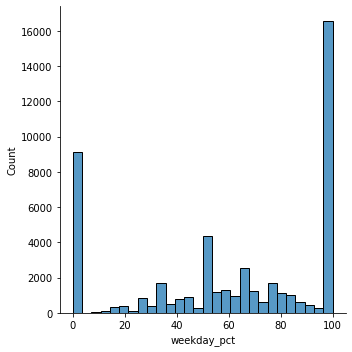

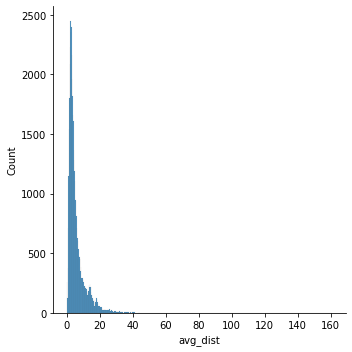

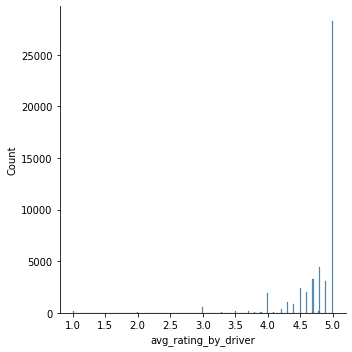

In [124]:
numeric_features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']

for col in numeric_features:
    sns.displot(data=df, x=col)

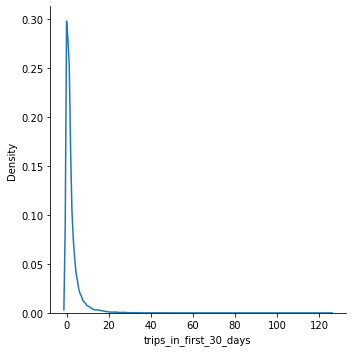

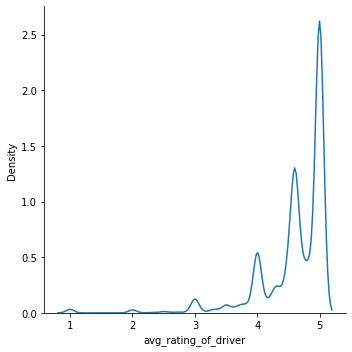

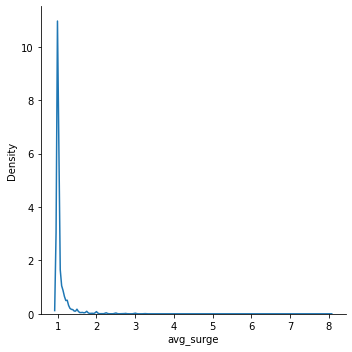

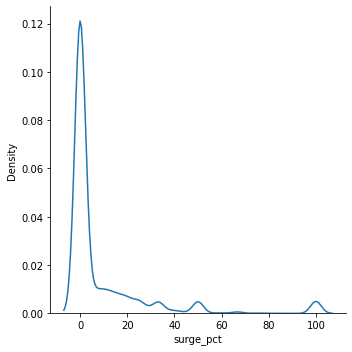

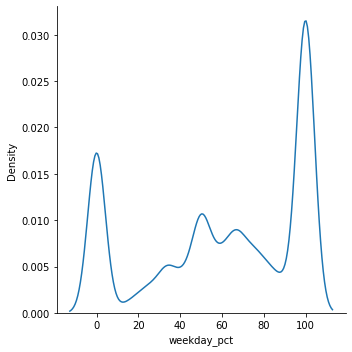

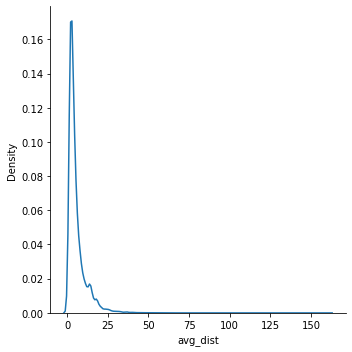

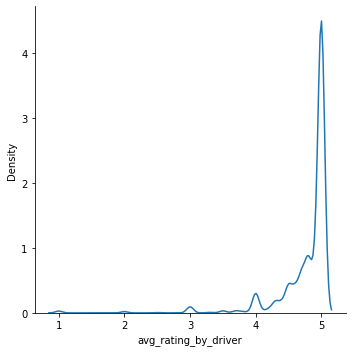

In [125]:
for col in numeric_features:
    sns.displot(data=df, x=col, kind='kde')

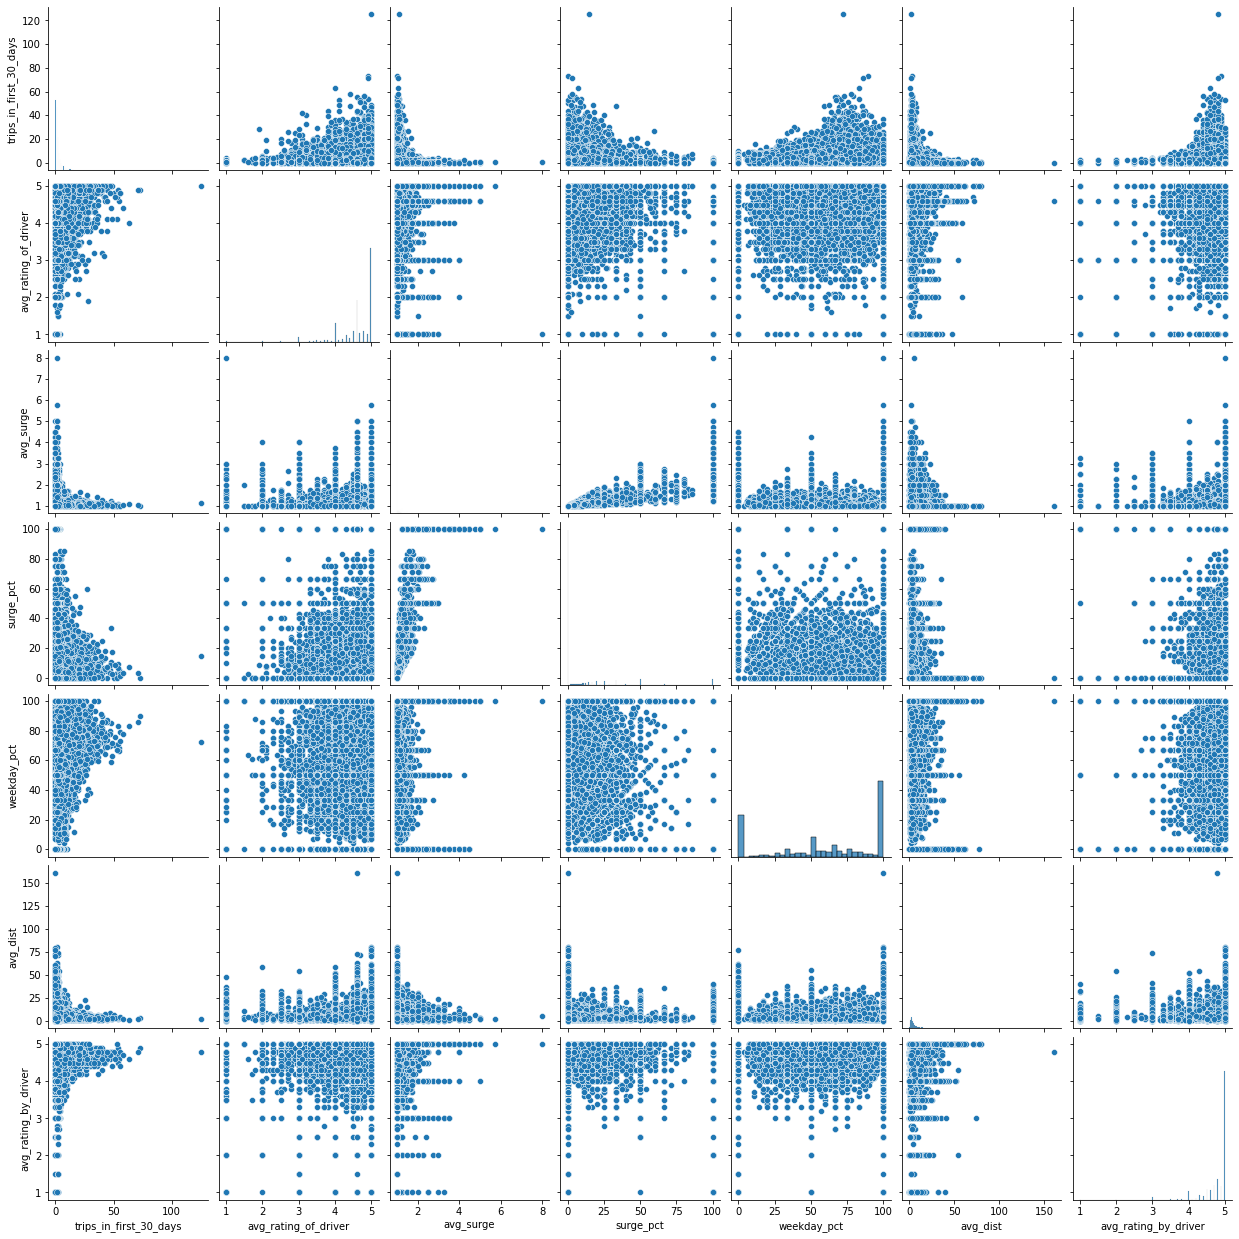

In [127]:
sns.pairplot(df[numeric_features])

<AxesSubplot:>

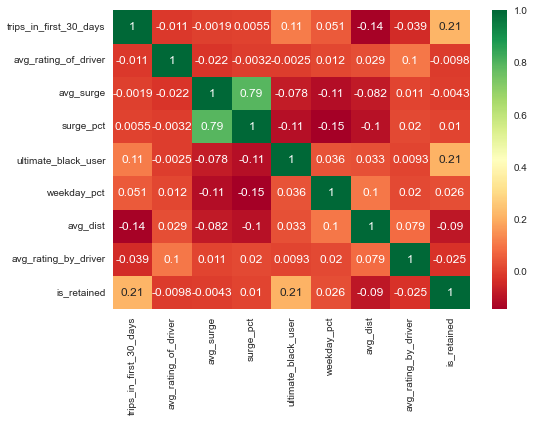

In [188]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)


### What fraction of the observed users were retained?

In [128]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [129]:
df['last_trip_date'].sort_values(ascending=False)

6356    2014-07-01
9491    2014-07-01
37021   2014-07-01
9439    2014-07-01
42346   2014-07-01
           ...    
16377   2014-01-01
36165   2014-01-01
35603   2014-01-01
7156    2014-01-01
38673   2014-01-01
Name: last_trip_date, Length: 49604, dtype: datetime64[ns]

A user is retained if they were “active” (i.e. took a trip) in the preceding 30 days. To find the percentage of users that were retained, we find the number of users who were active(has a last trip) in the 30 days before 2014-07-01.

In [133]:
retained_percent = len(df.loc[df['last_trip_date']>'2014-06-01']) / len(df)
retained_percent * 100

36.65027013950488

We see that 36.6% customers were retained.

### Predictive modeling

Here we need to predict whether the customer will be retained or not. Hence target variable needs to be added to the dataset.

In [137]:
df['is_retained'] = (df['last_trip_date']>'2014-06-01') * 1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  is_retained             49604 non-null  int32 

In [141]:
# check for class imbalance

df['is_retained'].value_counts(normalize=True)*100

0    63.34973
1    36.65027
Name: is_retained, dtype: float64

In [149]:
# data preparation

df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)

In [150]:
from pycaret.classification import *

p_classifier = setup(data = df, target='is_retained', train_size=0.8, fix_imbalance=True, session_id=47)

,Description,Value
0,session_id,47
1,Target,is_retained
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(49604, 11)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [164]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7967,0.8623,0.6883,0.7404,0.7133,0.5562,0.5571,5.3620
lightgbm,Light Gradient Boosting Machine,0.7956,0.8613,0.6901,0.7371,0.7127,0.5544,0.5551,0.3600
xgboost,Extreme Gradient Boosting,0.7921,0.8587,0.6824,0.7333,0.7069,0.5461,0.5470,0.9230
gbc,Gradient Boosting Classifier,0.7871,0.8540,0.7084,0.7114,0.7098,0.5417,0.5418,0.9680
ada,Ada Boost Classifier,0.7786,0.8455,0.7196,0.6908,0.7049,0.5278,0.5281,0.3240
rf,Random Forest Classifier,0.7616,0.8247,0.6788,0.6746,0.6767,0.4878,0.4879,0.9320
et,Extra Trees Classifier,0.7551,0.8097,0.6815,0.6621,0.6716,0.4764,0.4766,1.0170
knn,K Neighbors Classifier,0.7286,0.7857,0.7330,0.6086,0.6650,0.4403,0.4457,0.4290
dt,Decision Tree Classifier,0.7119,0.6920,0.6186,0.6058,0.6121,0.3831,0.3832,0.1050
lr,Logistic Regression,0.7079,0.7688,0.6766,0.5894,0.6300,0.3906,0.3932,0.8910


In [165]:
catboost = create_model('catboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7939,0.8585,0.6939,0.7315,0.7122,0.5518,0.5523
1,0.7979,0.8616,0.6915,0.7413,0.7155,0.5591,0.5599
2,0.8029,0.8669,0.6918,0.7521,0.7207,0.5689,0.5701
3,0.7908,0.8598,0.6776,0.7329,0.7042,0.5428,0.5438
4,0.7960,0.8617,0.6800,0.7430,0.7101,0.5532,0.5545
Mean,0.7963,0.8617,0.6870,0.7402,0.7125,0.5552,0.5561
SD,0.0041,0.0029,0.0067,0.0075,0.0055,0.0086,0.0087


In [166]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7931,0.8580,0.6980,0.7279,0.7126,0.5511,0.5514
1,0.7973,0.8599,0.6925,0.7394,0.7152,0.5581,0.5588
2,0.8018,0.8665,0.6963,0.7472,0.7209,0.5675,0.5684
3,0.7888,0.8582,0.6776,0.7286,0.7022,0.5389,0.5398
4,0.7979,0.8618,0.6879,0.7430,0.7144,0.5583,0.5593
Mean,0.7958,0.8609,0.6905,0.7372,0.7130,0.5548,0.5555
SD,0.0044,0.0031,0.0073,0.0077,0.0061,0.0095,0.0095


In [167]:
xgboost = create_model('xgboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7849,0.8509,0.6767,0.7210,0.6981,0.5314,0.5320
1,0.7954,0.8575,0.6867,0.7383,0.7115,0.5533,0.5542
2,0.7982,0.8651,0.6808,0.7475,0.7126,0.5576,0.5590
3,0.7879,0.8576,0.6800,0.7256,0.7021,0.5377,0.5384
4,0.7916,0.8587,0.6749,0.7360,0.7041,0.5437,0.5449
Mean,0.7916,0.8580,0.6798,0.7337,0.7057,0.5447,0.5457
SD,0.0048,0.0045,0.0040,0.0094,0.0056,0.0097,0.0099


In [175]:
catboost.get_params()

{'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 47}

In [177]:
lightgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 47,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [178]:
params = {'n_estimators':range(50, 150, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          'num_leaves':range(20,50)
          }

tuned_lightgbm = tune_model(lightgbm, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7884,0.8587,0.6813,0.7261,0.7030,0.5388,0.5395
1,0.7939,0.8572,0.6984,0.7294,0.7136,0.5527,0.5531
2,0.7997,0.8639,0.6799,0.7515,0.7139,0.5604,0.5621
3,0.7996,0.8602,0.7112,0.7349,0.7229,0.5661,0.5663
4,0.8085,0.8731,0.7078,0.7555,0.7309,0.5825,0.5832
5,0.7996,0.8633,0.6886,0.7465,0.7164,0.5619,0.5630
6,0.7908,0.8622,0.6859,0.7289,0.7067,0.5444,0.5450
7,0.7898,0.8559,0.6742,0.7325,0.7021,0.5402,0.5413
8,0.7959,0.8607,0.6879,0.7386,0.7124,0.5545,0.5553
9,0.7976,0.8626,0.6831,0.7450,0.7127,0.5570,0.5582


In [174]:
xgboost.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 47,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

In [179]:
params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
          'max_depth':range(4,10)
          }

tuned_xgboost = tune_model(xgboost, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.8560,0.6799,0.7257,0.7021,0.5376,0.5383
1,0.7904,0.8522,0.6964,0.7231,0.7095,0.5456,0.5459
2,0.7997,0.8620,0.6744,0.7546,0.7123,0.5594,0.5615
3,0.7956,0.8563,0.6968,0.7336,0.7147,0.5557,0.5561
4,0.8029,0.8670,0.7010,0.7471,0.7233,0.5705,0.5712
5,0.7956,0.8609,0.6749,0.7449,0.7082,0.5515,0.5531
6,0.7893,0.8582,0.6852,0.7260,0.7050,0.5414,0.5419
7,0.7823,0.8514,0.6756,0.7158,0.6951,0.5260,0.5265
8,0.7941,0.8562,0.6790,0.7394,0.7079,0.5494,0.5506
9,0.7916,0.8581,0.6838,0.7315,0.7068,0.5454,0.5462


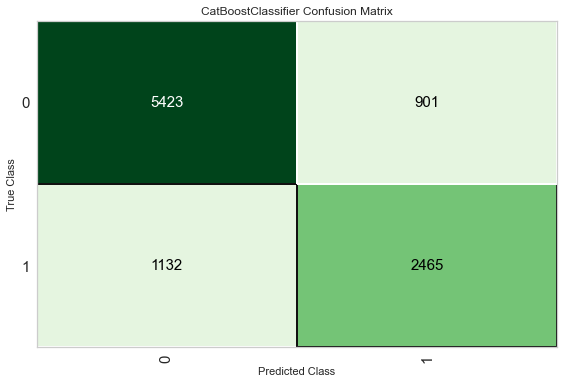

In [168]:
plot_model(catboost, plot = 'confusion_matrix')

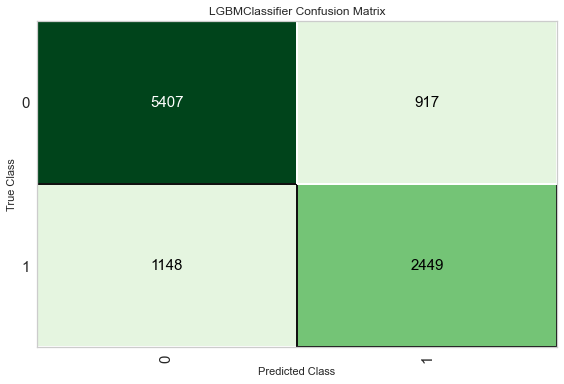

In [180]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

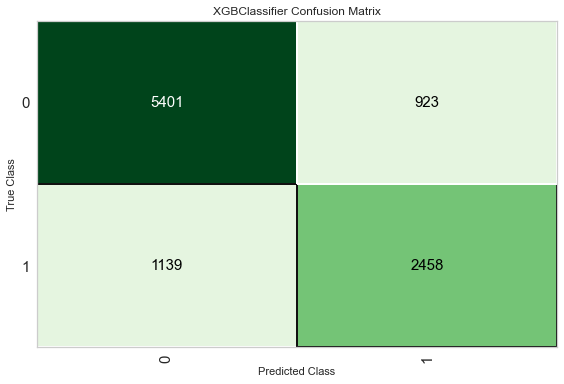

In [181]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

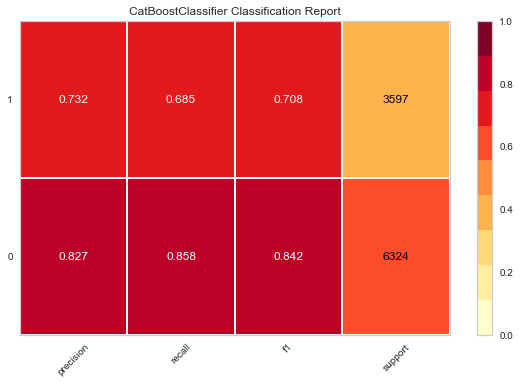

In [182]:
plot_model(catboost, plot = 'class_report')

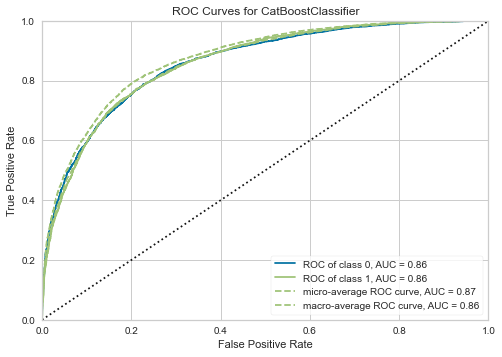

In [183]:
plot_model(catboost, plot = 'auc')

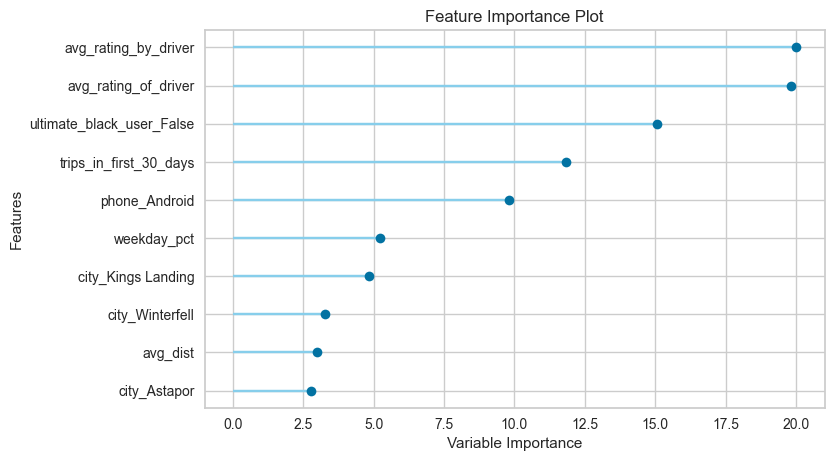

In [184]:
plot_model(catboost, plot = 'feature')

In [200]:
df.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'is_retained'],
      dtype='object')

### Key Insights

* As `avg_rating_of_driver` and `avg_rating_by_driver` plays a key role towards prediction, Ultimate can focus on improving the rating by providing good quality service.
* Ultimate can also promote trips in first 30 days of sign up by introducing suitable promotions.
* Suitable marketing strategies for Android and iphone users can also be devised.
